# Fellows Project: Sports Political Donations

## Andrew Nguyen

The data contains information following the story from https://fivethirtyeight.com/features/inside-the-political-donation-history-of-wealthy-sports-owners/

The dataset contains every confirmed partisan political contribution from team owners and commissioners in the NFL, NBA, WNBA, NHL, MLB and NASCAR. Only contributions while owners were involved with the team are included. The data is from the Federal Election Commission and OpenSecrets and can be found here: https://github.com/fivethirtyeight/data/tree/master/sports-political-donations

In [79]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


sports_don = Table.read_table('sports-political-donations.csv')
sports_don

Owner,Team,League,Recipient,Amount,Election Year,Party
Adam Silver,Commissioner,NBA,WRIGHT 2016,"$4,000",2016,Democrat
Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,"$2,800",2020,Democrat
Adam Silver,Commissioner,NBA,CORY 2020,"$2,700",2020,Democrat
Adam Silver,Commissioner,NBA,Kamala Harris for the People,"$2,700",2020,Democrat
Adam Silver,Commissioner,NBA,Win The Era PAC,"$2,700",2020,Democrat
Adam Silver,Commissioner,NBA,KOHL FOR CONGRESS,"$2,000",2018,Democrat
Adam Silver,Commissioner,NBA,BETO FOR TEXAS,"$1,000",2018,Democrat
Adam Silver,Commissioner,NBA,MONTANANS FOR TESTER,"$1,000",2018,Democrat
Adam Silver,Commissioner,NBA,SERVE AMERICA PAC,"$1,000",2018,Democrat
Adam Silver,Commissioner,NBA,ADAM SCHLEIFER FOR CONGRESS,"$1,000",2020,Democrat


Group the political parties to get the count data so we can visualize it. 

In [63]:
#Use the group() function
sports_don.group('Party')

Party,count
Bipartisan,195
"Bipartisan, but mostly Democratic",5
"Bipartisan, but mostly Republican",40
Democrat,921
Independent,3
Republican,1625
nan,9


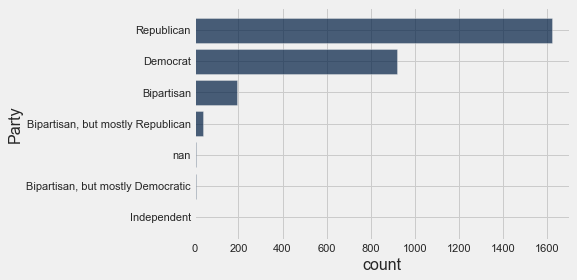

In [56]:
party_distr = sports_don.group('Party')
party_distr.sort('count', descending = True).barh('Party')

As we can see from both the table and bar plot, the Republican party -- in terms of sheer number of donors -- has the most donations from wealthy sports donors. We also want to know the amount of money that was donated, not just the number of donations.  

To do so, let's convert 'Amount' from categorical to numeric data. 
A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.
RegEx can be used to check if a string contains the specified search pattern.

In [84]:
#Python has a built-in package called re, which can be used to work with Regular Expressions.
#Import the re module:

import re

#Store sports donation data as a pandas dataframe
#import pandas as pd
import pandas as pd

df = pd.DataFrame(sports_don)

#Use replace function to remove $ and , .Then convert to numeric with float
df[df.columns[4:]] = df[df.columns[4:]].replace('[\$,]', '', regex=True).astype(float)

df

,0
0,Owner
1,Team
2,League
3,Recipient
4,Amount
5,Election Year
6,Party


In [68]:
sports_don.groups(['Election Year', 'Party'])

Election Year,Party,count
2016,Bipartisan,67
2016,"Bipartisan, but mostly Democratic",2
2016,"Bipartisan, but mostly Republican",12
2016,Democrat,295
2016,Independent,1
2016,Republican,567
2016,nan,2
2018,Bipartisan,65
2018,"Bipartisan, but mostly Democratic",2
2018,"Bipartisan, but mostly Republican",13


In [70]:
party_distr = sports_don.groups(['Election Year', 'Party'])
party_distr.sort('count', descending = True).barh('Election Year')

ValueError: The column 'Party' contains non-numerical values. A plot cannot be drawn for this column.

Questions to consider: 
1)Which sports league leans the most toward one party
2)Which league donates the most overall
3)Which election year had the most donations from sports organizations